In [13]:
from embeddings_loader import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from utils import *
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_labels, dev_labels, test_labels = load_labels()

In [4]:
label_replacement = {
    'Hope_speech': 0,
    'Non_hope_speech': 1,
    'not-English': 2,
}

In [5]:
# Replace labels with numbers
train_labels = [label_replacement[label] for label in train_labels]
dev_labels = [label_replacement[label] for label in dev_labels]
test_labels = [label_replacement[label] for label in test_labels]

In [6]:
mlp = MLPClassifier()
gridsearch = GridSearchCV(mlp, param_grid = {
    "activation": ["relu", "logistic", "tanh"],
    "early_stopping": [True],
    "learning_rate_init": [0.0001, 0.001, 0.01],
    "max_iter": [1000, 5000],
    "hidden_layer_sizes": [(150, 150)]
}, scoring = "f1_micro", verbose = 4, n_jobs=os.cpu_count()//4)

### Glove Twitter 25

In [6]:
gt25_train, gt25_dev, gt25_test = load_glove_twitter_25()

In [7]:
# Set all NaN values to 0
gt25_train = np.nan_to_num(gt25_train)
gt25_dev = np.nan_to_num(gt25_dev)
gt25_test = np.nan_to_num(gt25_test)

In [8]:
grid_results = gridsearch.fit(gt25_train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   5.1s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   2.4s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   2.4s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   2.5s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   2.4s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.914 total time=   4.7s
[CV

In [9]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.001,
 'max_iter': 1000}

In [10]:
mlp = mlp.fit(gt25_train, train_labels)
save_model(mlp, "mlp_gt25.joblib")

In [11]:
train_preds = mlp.predict(gt25_train)
dev_preds = mlp.predict(gt25_dev)
test_preds = mlp.predict(gt25_test)

In [12]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9218434232492752
Accuracy Dev:  0.911712979247274
Accuracy Test:  0.9188334504567814
Weighted F1 Train:  0.8999645351976132
Weighted F1 Dev:  0.8877635306763886
Weighted F1 Test:  0.8989814879465051
Macro F1 Train:  0.5334138774444986
Macro F1 Dev:  0.4104161067995689
Macro F1 Test:  0.4219952840591019
Micro F1 Train:  0.9218434232492752
Micro F1 Dev:  0.911712979247274
Micro F1 Test:  0.9188334504567814
Weighted Recall Train:  0.9218434232492752
Weighted Recall Dev:  0.911712979247274
Weighted Recall Test:  0.9188334504567814
Macro Recall Train:  0.466147650573044
Macro Recall Dev:  0.3889130584113754
Macro Recall Test:  0.3976053477310708
Micro Recall Train:  0.9218434232492752
Micro Recall Dev:  0.911712979247274
Micro Recall Test:  0.9188334504567814
Confusion Matrix Train: 
[[  350  1612     0]
 [  149 20628     1]
 [    0    17     5]]
Confusion Matrix Dev: 
[[  48  224    0]
 [  25 2544    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  51  199    0]
 [  29 

### FastText 300 

In [13]:
ft300_train, ft300_dev, ft300_test = load_fasttext_300()

In [14]:
# Set all NaN values to 0
ft300_train = np.nan_to_num(ft300_train)
ft300_dev = np.nan_to_num(ft300_dev)
ft300_test = np.nan_to_num(ft300_test)

In [15]:
grid_results = gridsearch.fit(ft300_train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   3.5s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   3.4s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   3.5s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   3.4s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.913 total time=   3.5s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.913 total time=   3.4s
[CV

In [16]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.001,
 'max_iter': 1000}

In [17]:
mlp = mlp.fit(ft300_train, train_labels)
save_model(mlp, "mlp_ft300.joblib")

In [18]:
train_preds = mlp.predict(ft300_train)
dev_preds = mlp.predict(ft300_dev)
test_preds = mlp.predict(ft300_test)

In [19]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9373956594323873
Accuracy Dev:  0.915933872669715
Accuracy Test:  0.9255094869992972
Weighted F1 Train:  0.9272621554844466
Weighted F1 Dev:  0.9013330830682592
Weighted F1 Test:  0.9138862061745193
Macro F1 Train:  0.6373579052102539
Macro F1 Dev:  0.4526058165577942
Macro F1 Test:  0.4685712345402832
Micro F1 Train:  0.9373956594323873
Micro F1 Dev:  0.915933872669715
Micro F1 Test:  0.9255094869992972
Weighted Recall Train:  0.9373956594323873
Weighted Recall Dev:  0.915933872669715
Weighted Recall Test:  0.9255094869992972
Macro Recall Train:  0.5491184374411252
Macro Recall Dev:  0.42553370121890716
Macro Recall Test:  0.4398056305437717
Micro Recall Train:  0.9373956594323873
Micro Recall Dev:  0.915933872669715
Micro Recall Test:  0.9255094869992972
Confusion Matrix Train: 
[[  754  1208     0]
 [  201 20577     0]
 [    0    16     6]]
Confusion Matrix Dev: 
[[  80  192    0]
 [  45 2524    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  84  166    0]
 [  4

### Word2Vec 300

In [20]:
w2v300_train, w2v300_dev, w2v300_test = load_word2vec_300()

In [21]:
# Set all NaN values to 0
w2v300_train = np.nan_to_num(w2v300_train)
w2v300_dev = np.nan_to_num(w2v300_dev)
w2v300_test = np.nan_to_num(w2v300_test)

In [22]:
grid_results = gridsearch.fit(w2v300_train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.925 total time=  19.5s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.925 total time=  17.5s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.921 total time=  11.7s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.925 total time=  24.3s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.921 total time=  19.6s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.918 total time=   9.2s
[CV

In [23]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.001,
 'max_iter': 5000}

In [24]:
mlp = mlp.fit(w2v300_train, train_labels)
save_model(mlp, "mlp_w2v300.joblib")

In [25]:
train_preds = mlp.predict(w2v300_train)
dev_preds = mlp.predict(w2v300_dev)
test_preds = mlp.predict(w2v300_test)

In [26]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9296195413408312
Accuracy Dev:  0.9180443193809357
Accuracy Test:  0.9276177090653549
Weighted F1 Train:  0.9171879809978131
Weighted F1 Dev:  0.904843801665825
Weighted F1 Test:  0.9158326879490332
Macro F1 Train:  0.5251880441683358
Macro F1 Dev:  0.4618308274808875
Macro F1 Test:  0.47233771150340487
Micro F1 Train:  0.9296195413408312
Micro F1 Dev:  0.9180443193809357
Micro F1 Test:  0.9276177090653549
Weighted Recall Train:  0.9296195413408312
Weighted Recall Dev:  0.9180443193809357
Weighted Recall Test:  0.9276177090653549
Macro Recall Train:  0.4678901669367061
Macro Recall Dev:  0.43398238041810727
Macro Recall Test:  0.44178172001542615
Micro Recall Train:  0.9296195413408312
Micro Recall Dev:  0.9180443193809357
Micro Recall Test:  0.9276177090653549
Confusion Matrix Train: 
[[  638  1324     0]
 [  258 20520     0]
 [    0    20     2]]
Confusion Matrix Dev: 
[[  87  185    0]
 [  46 2523    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  85  165    0]


### TF-IDF PCA (1000 Dims)

In [27]:
tfidf_pca_train, tfidf_pca_dev, tfidf_pca_test = load_tfidf_pca()

In [28]:
grid_results = gridsearch.fit(tfidf_pca_train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.925 total time=  19.4s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.927 total time=  24.0s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.931 total time=  24.8s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.923 total time=  35.0s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.925 total time=  25.5s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.925 total time=  21.6s
[CV

In [29]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.0001,
 'max_iter': 1000}

In [30]:
mlp = mlp.fit(tfidf_pca_train, train_labels)
save_model(mlp, "mlp_tfidf_pca.joblib")

In [31]:
train_preds = mlp.predict(tfidf_pca_train)
dev_preds = mlp.predict(tfidf_pca_dev)
test_preds = mlp.predict(tfidf_pca_test)

In [32]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9421404094543537
Accuracy Dev:  0.9205065072106929
Accuracy Test:  0.9283204497540407
Weighted F1 Train:  0.9339910467244844
Weighted F1 Dev:  0.9085433203075408
Weighted F1 Test:  0.918706838141178
Macro F1 Train:  0.5142859159133335
Macro F1 Dev:  0.47114756594035284
Macro F1 Test:  0.4824761358578588
Micro F1 Train:  0.9421404094543537
Micro F1 Dev:  0.9205065072106929
Micro F1 Test:  0.9283204497540408
Weighted Recall Train:  0.9421404094543537
Weighted Recall Dev:  0.9205065072106929
Weighted Recall Test:  0.9283204497540407
Macro Recall Train:  0.47819274660164063
Macro Recall Dev:  0.4425608117906563
Macro Recall Test:  0.4540866435274457
Micro Recall Train:  0.9421404094543537
Micro Recall Dev:  0.9205065072106929
Micro Recall Test:  0.9283204497540407
Confusion Matrix Train: 
[[  872  1090     0]
 [  205 20573     0]
 [    0    22     0]]
Confusion Matrix Dev: 
[[  94  178    0]
 [  46 2523    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  95  155    0]
 

### Sentence Transformer Faster No PCA

In [33]:
train, dev, test = load_sent_trans_fast_no_pca()

In [34]:
grid_results = gridsearch.fit(train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.926 total time=   4.1s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.931 total time=   5.8s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.928 total time=   7.4s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.930 total time=  11.7s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.922 total time=   3.8s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.928 total time=   8.9s
[CV

In [35]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.001,
 'max_iter': 5000}

In [36]:
mlp = mlp.fit(train, train_labels)
save_model(mlp, "mlp_faster_no_pca.joblib")

In [37]:
train_preds = mlp.predict(train)
dev_preds = mlp.predict(dev)
test_preds = mlp.predict(test)

In [38]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9448203145593533
Accuracy Dev:  0.9243756595145972
Accuracy Test:  0.9300773014757554
Weighted F1 Train:  0.9374934991711371
Weighted F1 Dev:  0.9137604611516305
Weighted F1 Test:  0.9199324611113723
Macro F1 Train:  0.5233339890955815
Macro F1 Dev:  0.48360369018019506
Macro F1 Test:  0.48402385066499104
Micro F1 Train:  0.9448203145593533
Micro F1 Dev:  0.9243756595145972
Micro F1 Test:  0.9300773014757555
Weighted Recall Train:  0.9448203145593533
Weighted Recall Dev:  0.9243756595145972
Weighted Recall Test:  0.9300773014757554
Macro Recall Train:  0.48717165268016077
Macro Recall Dev:  0.4538497279020601
Macro Recall Test:  0.4535246175600977
Micro Recall Train:  0.9448203145593533
Micro Recall Dev:  0.9243756595145972
Micro Recall Test:  0.9300773014757554
Confusion Matrix Train: 
[[  924  1038     0]
 [  196 20582     0]
 [    0    22     0]]
Confusion Matrix Dev: 
[[ 103  169    0]
 [  44 2525    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  94  156    0]

### Sentence Transformer Faster PCA

In [39]:
train, dev, test = load_sent_trans_fast_pca()

In [40]:
grid_results = gridsearch.fit(train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.924 total time=   4.8s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.931 total time=   7.2s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.924 total time=   6.0s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.925 total time=   4.8s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.924 total time=   7.2s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.926 total time=   5.9s
[CV

In [41]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.001,
 'max_iter': 1000}

In [42]:
mlp = mlp.fit(train, train_labels)
save_model(mlp, "mlp_faster_pca.joblib")

In [43]:
train_preds = mlp.predict(train)
dev_preds = mlp.predict(dev)
test_preds = mlp.predict(test)

In [44]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9409981548194359
Accuracy Dev:  0.9226169539219135
Accuracy Test:  0.9262122276879832
Weighted F1 Train:  0.9320050528813919
Weighted F1 Dev:  0.9104973078959702
Weighted F1 Test:  0.9144515700052184
Macro F1 Train:  0.5084252401539775
Macro F1 Dev:  0.4746626727516885
Macro F1 Test:  0.4694939154434827
Micro F1 Train:  0.9409981548194359
Micro F1 Dev:  0.9226169539219135
Micro F1 Test:  0.9262122276879832
Weighted Recall Train:  0.9409981548194359
Weighted Recall Dev:  0.9226169539219135
Weighted Recall Test:  0.9262122276879832
Macro Recall Train:  0.47131385240544454
Macro Recall Dev:  0.4444350628534792
Macro Recall Test:  0.4400627329991002
Micro Recall Train:  0.9409981548194359
Micro Recall Dev:  0.9226169539219135
Micro Recall Test:  0.9262122276879832
Confusion Matrix Train: 
[[  830  1132     0]
 [  189 20589     0]
 [    0    22     0]]
Confusion Matrix Dev: 
[[  95  177    0]
 [  41 2528    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[  84  166    0]
 

### Sentence Transformer Better No PCA

In [45]:
train, dev, test = load_sent_trans_better_no_pca()

In [46]:
grid_results = gridsearch.fit(train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.929 total time=   9.1s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.935 total time=   7.8s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.928 total time=   9.4s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.933 total time=  11.3s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.926 total time=   5.4s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.929 total time=   5.2s
[CV

In [47]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.0001,
 'max_iter': 1000}

In [48]:
mlp = mlp.fit(train, train_labels)
save_model(mlp, "mlp_better_no_pca.joblib")

In [49]:
train_preds = mlp.predict(train)
dev_preds = mlp.predict(dev)
test_preds = mlp.predict(test)

In [50]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9369563307266496
Accuracy Dev:  0.9243756595145972
Accuracy Test:  0.9332396345748419
Weighted F1 Train:  0.9283795481788166
Weighted F1 Dev:  0.9130958887544959
Weighted F1 Test:  0.9242596934748624
Macro F1 Train:  0.5015248346390272
Macro F1 Dev:  0.48115742571816583
Macro F1 Test:  0.49529218025943617
Micro F1 Train:  0.9369563307266496
Micro F1 Dev:  0.9243756595145972
Micro F1 Test:  0.9332396345748419
Weighted Recall Train:  0.9369563307266496
Weighted Recall Dev:  0.9243756595145972
Weighted Recall Test:  0.9332396345748419
Macro Recall Train:  0.4689148200249833
Macro Recall Dev:  0.4505625138338714
Macro Recall Test:  0.4643198354544286
Micro Recall Train:  0.9369563307266496
Micro Recall Dev:  0.9243756595145972
Micro Recall Test:  0.9332396345748419
Confusion Matrix Train: 
[[  824  1138     0]
 [  275 20503     0]
 [    0    22     0]]
Confusion Matrix Dev: 
[[ 100  172    0]
 [  41 2528    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[ 102  148    0]


### Sentence Transformer Better PCA

In [51]:
train, dev, test = load_sent_trans_better_pca()

In [52]:
grid_results = gridsearch.fit(train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.929 total time=   6.1s
[CV 2/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.932 total time=   6.0s
[CV 3/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.929 total time=   5.0s
[CV 4/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.932 total time=   8.6s
[CV 5/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=1000;, score=0.931 total time=   5.0s
[CV 1/5] END activation=relu, early_stopping=True, hidden_layer_sizes=(150, 150), learning_rate_init=0.0001, max_iter=5000;, score=0.930 total time=   6.3s
[CV

In [53]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.001,
 'max_iter': 5000}

In [54]:
mlp = mlp.fit(train, train_labels)
save_model(mlp, "mlp_better_pca.joblib")

In [55]:
train_preds = mlp.predict(train)
dev_preds = mlp.predict(dev)
test_preds = mlp.predict(test)

In [56]:
computeAllScores(train_preds, dev_preds, test_preds)

Accuracy Train:  0.9490378701344346
Accuracy Dev:  0.9257826239887443
Accuracy Test:  0.9339423752635277
Weighted F1 Train:  0.9436679120401092
Weighted F1 Dev:  0.9177799181950227
Weighted F1 Test:  0.9262171518850802
Macro F1 Train:  0.5402953484446836
Macro F1 Dev:  0.49598573727522294
Macro F1 Test:  0.501792427646479
Micro F1 Train:  0.9490378701344346
Micro F1 Dev:  0.9257826239887443
Micro F1 Test:  0.9339423752635277
Weighted Recall Train:  0.9490378701344346
Weighted Recall Dev:  0.9257826239887443
Weighted Recall Test:  0.9339423752635277
Macro Recall Train:  0.5079432501776707
Macro Recall Dev:  0.4697090689136691
Macro Recall Test:  0.47301041264944077
Micro Recall Train:  0.9490378701344346
Micro Recall Dev:  0.9257826239887443
Micro Recall Test:  0.9339423752635277
Confusion Matrix Train: 
[[ 1049   913     0]
 [  225 20553     0]
 [    0    22     0]]
Confusion Matrix Dev: 
[[ 117  155    0]
 [  54 2515    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[ 109  141    0]
 

## Only 2 Class Augmented Data Sentence Transformer Better

In [8]:
train, dev, test, train_labels, dev_labels, test_labels = load_only_2_class("sent_trans_augmented_no_pca", True)

In [9]:
train_labels = [label_replacement[label] for label in train_labels]
dev_labels = [label_replacement[label] for label in dev_labels]
test_labels = [label_replacement[label] for label in test_labels]

In [10]:
grid_results = gridsearch.fit(train, train_labels)
best_params = grid_results.best_params_
mlp = grid_results.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [11]:
best_params

{'activation': 'relu',
 'early_stopping': True,
 'hidden_layer_sizes': (150, 150),
 'learning_rate_init': 0.01,
 'max_iter': 5000}

In [12]:
# mlp = load_model("mlp_sent_trans_augmented_no_pca.joblib")

In [13]:
mlp = mlp.fit(train, train_labels)
save_model(mlp, "mlp_sent_trans_augmented_no_pca.joblib")

In [14]:
train_preds = mlp.predict(train)
dev_preds = mlp.predict(dev)
test_preds = mlp.predict(test)

In [15]:
computeAllScores(train_preds, dev_preds, test_preds, aug=True)

Accuracy Train:  0.988462082959747
Accuracy Dev:  0.88287020752726
Accuracy Test:  0.8815881939564301
Weighted F1 Train:  0.9884556779423381
Weighted F1 Dev:  0.8894235093111817
Weighted F1 Test:  0.8914335547796407
Macro F1 Train:  0.8971561134127634
Macro F1 Dev:  0.4692975048709034
Macro F1 Test:  0.46663078228169574
Micro F1 Train:  0.988462082959747
Micro F1 Dev:  0.8828702075272599
Micro F1 Test:  0.8815881939564301
Weighted Recall Train:  0.988462082959747
Weighted Recall Dev:  0.88287020752726
Weighted Recall Test:  0.8815881939564301
Macro Recall Train:  0.8863514851018394
Macro Recall Dev:  0.48894292049244764
Macro Recall Test:  0.4984332176372284
Micro Recall Train:  0.988462082959747
Micro Recall Dev:  0.88287020752726
Micro Recall Test:  0.8815881939564301
Confusion Matrix Train: 
[[21340   242     0]
 [  235 20538     5]
 [    0     7    15]]
Confusion Matrix Dev: 
[[ 149  123    0]
 [ 208 2361    0]
 [   0    2    0]]
Confusion Matrix Test: 
[[ 146  104    0]
 [ 230 236

### MLP Loss Curve

In [15]:
train, dev, test, train_labels, dev_labels, test_labels = load_only_2_class("sent_trans_augmented_no_pca", True)

In [16]:
train_labels = [label_replacement[label] for label in train_labels]
dev_labels = [label_replacement[label] for label in dev_labels]
test_labels = [label_replacement[label] for label in test_labels]

In [27]:
mlp = MLPClassifier(activation = 'relu', hidden_layer_sizes = (150, 150), learning_rate_init = 0.01, max_iter = 5000)

In [31]:
def train_model(model, epochs, n_iter_no_change = 10, early_stopping = True, tol = 1e-4):
    train_loss = []
    validation_loss = []
    train_accuracy = []
    validation_accuracy = []
    for epoch in range(epochs):
        model.partial_fit(train, train_labels, classes=np.unique(train_labels))
        train_loss.append(model.loss_)
        validation_loss.append(log_loss(dev_labels, model.predict_proba(dev)))
        train_accuracy.append(accuracy_score(mlp.predict(train), train_labels))
        validation_accuracy.append(accuracy_score(mlp.predict(dev), dev_labels))
        # Early stopping
        if early_stopping:
            if epoch > n_iter_no_change:
                if np.mean(validation_loss[-n_iter_no_change:]) - validation_loss[-1] < tol:
                    break
    return model, train_loss, validation_loss, train_accuracy, validation_accuracy

In [32]:
mlp, train_loss, validation_loss, train_acc, validation_acc = train_model(mlp, 5000)

In [35]:
def plot_history(train_loss, validation_loss, train_acc, validation_acc):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='loss')
    plt.plot(validation_loss, label='val_loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='accuracy')
    plt.plot(validation_acc, label='val_accuracy')
    plt.legend()
    plt.show()

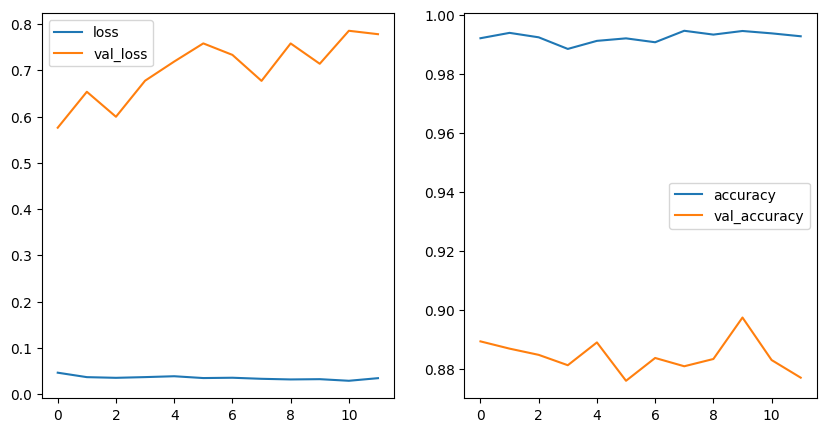

In [36]:
plot_history(train_loss, validation_loss, train_acc, validation_acc)